# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [2]:
df = pd.read_csv('D:/Tina/BerkleyML/Module 17/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.shape

(41188, 21)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [71]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['education']= df['education'].apply(lambda d: max(d.split('.')))

In [9]:
missing_vals = df.isnull().sum()

In [123]:
print(missing_vals)

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
response_binary    0
dtype: int64


In [10]:
# Finding the percentage of each class in the feature 'y'
responsePercentage = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(responsePercentage)

no     88.734583
yes    11.265417
Name: y, dtype: float64


In [11]:
# Change column name: 'y' to 'response'
df.rename(index=str, columns={'y': 'response'}, inplace = True)

In [12]:
# Change the response values to binary 
def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")

0    36548
1     4640
Name: response_binary, dtype: int64

In [13]:
print(df)

       age          job  marital     education  default housing loan  \
0       56    housemaid  married         basic       no      no   no   
1       57     services  married        school  unknown      no   no   
2       37     services  married        school       no     yes   no   
3       40       admin.  married         basic       no      no   no   
4       56     services  married        school       no      no  yes   
...    ...          ...      ...           ...      ...     ...  ...   
41183   73      retired  married  professional       no     yes   no   
41184   46  blue-collar  married  professional       no      no   no   
41185   56      retired  married    university       no     yes   no   
41186   44   technician  married  professional       no      no   no   
41187   74      retired  married  professional       no     yes   no   

         contact month day_of_week  ...  pdays  previous     poutcome  \
0      telephone   may         mon  ...    999         0  none

In [56]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

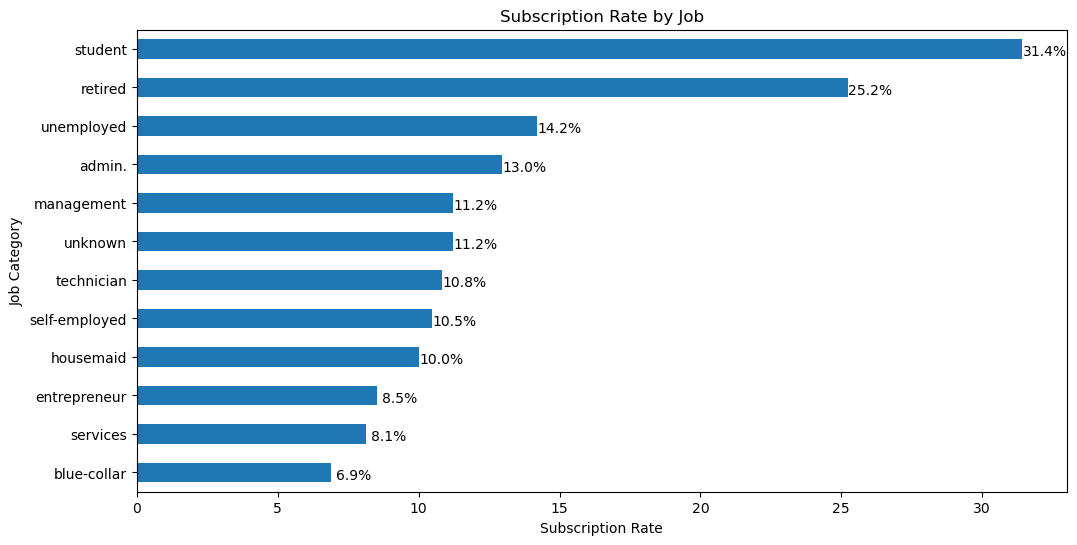

In [57]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Students and Retired sectors has better subscription rate.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
data=df[['age','job','marital','education','default','housing','loan','response_binary']]

<Axes: xlabel='response_binary', ylabel='count'>

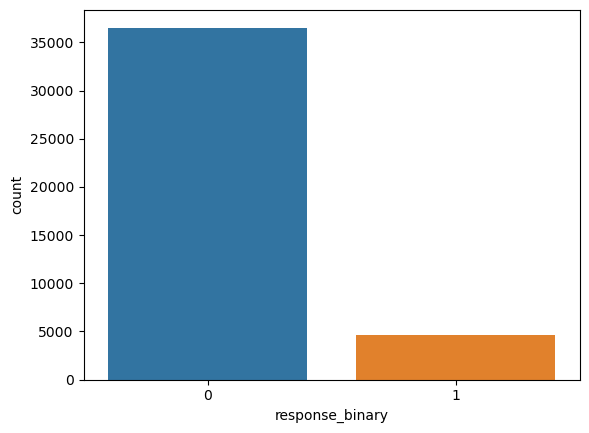

In [15]:
sns.countplot(data = data, x = 'response_binary')

In [16]:
groupByJob = data.groupby('job').size()
print(groupByJob)

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64


In [77]:
print(data)

       age          job  marital     education  default housing loan  \
0       56    housemaid  married         basic       no      no   no   
1       57     services  married        school  unknown      no   no   
2       37     services  married        school       no     yes   no   
3       40       admin.  married         basic       no      no   no   
4       56     services  married        school       no      no  yes   
...    ...          ...      ...           ...      ...     ...  ...   
41183   73      retired  married  professional       no     yes   no   
41184   46  blue-collar  married  professional       no      no   no   
41185   56      retired  married    university       no     yes   no   
41186   44   technician  married  professional       no      no   no   
41187   74      retired  married  professional       no     yes   no   

       response_binary  
0                    0  
1                    0  
2                    0  
3                    0  
4         

In [17]:
#Identifying Number features
numeric_data = data.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns      # we will store the numeric features in a variable
print(numeric_col)

Index(['age', 'response_binary'], dtype='object')


In [18]:
#Identifying Categorical features
categorical_data = data.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns 

In [19]:
print(categorical_data.head())

         job  marital education  default housing loan
0  housemaid  married     basic       no      no   no
1   services  married    school  unknown      no   no
2   services  married    school       no     yes   no
3     admin.  married     basic       no      no   no
4   services  married    school       no      no  yes


In [133]:
# for column in categorical_col:
#     plt.figure(figsize=(20,4))
#     plt.subplot(121)
#     sns.countplot(x=data[column],hue=data['response_binary'],data=data)
#     plt.title(column)    
#     plt.xticks(rotation=90)

In [20]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
# Initializing lable encoder
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        data[feature] = le.fit_transform(data[feature])
    except:
        print('Error encoding '+feature)

C:\Users\suchi\AppData\Local\Temp\ipykernel_19968\281132968.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = le.fit_transform(data[feature])
C:\Users\suchi\AppData\Local\Temp\ipykernel_19968\281132968.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = le.fit_transform(data[feature])
C:\Users\suchi\AppData\Local\Temp\ipykernel_19968\281132968.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [135]:
print(data)

       age  job  marital  education  default  housing  loan  response_binary
0       56    3        1          0        0        0     0                0
1       57    7        1          3        1        0     0                0
2       37    7        1          3        0        2     0                0
3       40    0        1          0        0        0     0                0
4       56    7        1          3        0        0     2                0
...    ...  ...      ...        ...      ...      ...   ...              ...
41183   73    5        1          2        0        2     0                1
41184   46    1        1          2        0        0     0                0
41185   56    5        1          4        0        2     0                0
41186   44    9        1          2        0        0     0                1
41187   74    5        1          2        0        2     0                0

[41188 rows x 8 columns]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
from sklearn.model_selection import train_test_split
# Predictors
X = data.iloc[:,:-1]

# Target
y = data.iloc[:,-1]



In [22]:
# Dividing the data into train and test subsets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtree_BM = DecisionTreeClassifier(random_state=0)
dtree_BM.fit(x_train, y_train)
y_pred_dtree_BM = dtree_BM.predict(x_test)

In [53]:
roc_dtree_BM=roc_auc_score(y_test, y_pred_dtree_BM)
acc_dtree_BM = accuracy_score(y_test, y_pred_dtree_BM)
prec_dtree_BM = precision_score(y_test, y_pred_dtree_BM)
rec_dtree_BM = recall_score(y_test, y_pred_dtree_BM)
f1_dtree_BM = f1_score(y_test, y_pred_dtree_BM)

results_dtree_BM = pd.DataFrame([['Decision Tree Base Model', acc_dtree_BM,prec_dtree_BM,rec_dtree_BM, f1_dtree_BM,roc_dtree_BM]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_dtree_BM

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Base Model,0.863721,0.278719,0.102139,0.149495,0.533514


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [42]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0)
start_log = time.time()
log.fit(x_train, y_train)
stop_log = time.time()
trainTime_log = (stop_log- start_log)
y_pred_log = log.predict(x_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [43]:
acc_ts_log = accuracy_score(y_test, y_pred_log)

acc_tr_log = log.score(x_train,y_train)

results_log = pd.DataFrame([['Logistic Regression Simple Model', trainTime_log, acc_tr_log, acc_ts_log]],
               columns = ['Model', 'Traning Time(s)','Train Accuracy' , 'Test Accuracy'])
results_log

,Model,Traning Time(s),Train Accuracy,Test Accuracy
0,Logistic Regression Simple Model,0.123723,0.889321,0.882739


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
start_knn = time.time()
knn.fit(x_train, y_train)
stop_knn = time.time()
trainTime_knn = (stop_knn- start_knn)

In [30]:
y_pred_knn = knn.predict(x_test)

In [32]:
acc_ts_knn = accuracy_score(y_test, y_pred_knn)

acc_tr_knn = knn.score(x_train,y_train)

results_knn = pd.DataFrame([['KNN', trainTime_knn, acc_tr_knn, acc_ts_knn]],
               columns = ['Model', 'Traning Time(s)','Train Accuracy' , 'Test Accuracy'])
results_knn

,Model,Traning Time(s),Train Accuracy,Test Accuracy
0,KNN,0.054106,0.880337,0.817998


In [48]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)
start_dtree = time.time()
dtree.fit(x_train, y_train)
stop_dtree = time.time()
trainTime_dtree = (stop_dtree- start_dtree)

In [49]:
y_pred_dtree = dtree.predict(x_test)

In [50]:
acc_ts_dtree = accuracy_score(y_test, y_pred_dtree)

acc_tr_dtree = dtree.score(x_train,y_train)

results_dtree = pd.DataFrame([['Decision Tree',trainTime_dtree, acc_tr_dtree, acc_ts_dtree]],
               columns = ['Model','Training Time(s)', 'Train Accuracy', 'Test Accuracy'])
results_dtree

,Model,Training Time(s),Train Accuracy,Test Accuracy
0,Decision Tree,0.073704,0.917172,0.863721


In [36]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
start_svc = time.time()
svc.fit(x_train, y_train)
stop_svc = time.time()
trainTime_svc = (stop_svc- start_svc)

In [37]:
y_pred_svc = svc.predict(x_test)

In [38]:
acc_ts_svc = accuracy_score(y_test, y_pred_svc)

acc_tr_svc = svc.score(x_train,y_train)

results_svc = pd.DataFrame([['SVM', trainTime_svc, acc_tr_svc, acc_ts_svc]],
               columns = ['Model','Training Time(s)', 'Train Accuracy', 'Test Accuracy'])
results_svc

,Model,Training Time(s),Train Accuracy,Test Accuracy
0,SVM,23.321894,0.889321,0.882739


Logistic Regression has less training time and better Train and Test Accuracy than others.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [103]:
# Build knn pipeline 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

knn_pipe_5 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=6))])
start_knn_5 = time.time()
knn_pipe_5.fit(x_train, y_train)
stop_knn_5 = time.time()
trainTime_knn_5 = (stop_knn_5- start_knn_5)


In [104]:
y_pred_knn_5 = knn_pipe_5.predict(x_test)

In [105]:
acc_ts_knn_5 = accuracy_score(y_test, y_pred_knn_5)

acc_tr_knn_5 = knn_pipe_5.score(x_train,y_train)

results_knn_5 = pd.DataFrame([['KNN', trainTime_knn_5, acc_tr_knn_5, acc_ts_knn_5]],
               columns = ['Model', 'Traning Time(s)','Train Accuracy' , 'Test Accuracy'])
results_knn_5

,Model,Traning Time(s),Train Accuracy,Test Accuracy
0,KNN,0.05143,0.892373,0.880877


This KNN model build with StandardScaler and KNeighborsClassifier components in the pipeline and n_neighbors=5 yields a better Accuracy than KNN base model. But descion tree is a bit better. 

In [112]:
dtree_ent = DecisionTreeClassifier(criterion='entropy',max_depth=5)
start_dtree_ent = time.time()
dtree_ent.fit(x_train, y_train)
stop_dtree_ent = time.time()
trainTime_dtree_ent = (stop_dtree_ent- start_dtree_ent)

In [113]:
y_pred_dtree_ent = dtree_ent.predict(x_test)

In [114]:
acc_ts_dtree_ent = accuracy_score(y_test, y_pred_dtree_ent)

acc_tr_dtree_ent = dtree_ent.score(x_train,y_train)

results_dtree_ent = pd.DataFrame([['Decision Tree',trainTime_dtree_ent, acc_tr_dtree_ent, acc_ts_dtree_ent]],
               columns = ['Model','Training Time(s)', 'Train Accuracy', 'Test Accuracy'])
results_dtree_ent

,Model,Training Time(s),Train Accuracy,Test Accuracy
0,Decision Tree,0.019472,0.88998,0.88201


Recommendations: 
The data is highly imbalanced with No: Yes = 89:11. 
After improving the model, I recommend Decision Tree Classifier as better model for the dataset taken up for research. 
Also the telemarketing team should focus on the Student and Retired individuals for a better subscription rate. 


##### Questions